# Import Packages

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

# Read Data

In [21]:
data = pd.read_csv("adidas-quarterly-sales.csv")
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


# Have a look at the quarterly sales revenue of Adidas

In [22]:
import plotly.express as px
figure = px.line(data, x="Time Period",
                 y="Revenue",
                 title='Quarterly Sales Revenue of Adidas in Millions')
figure.show()

# Check the seasonality

<Figure size 640x480 with 0 Axes>

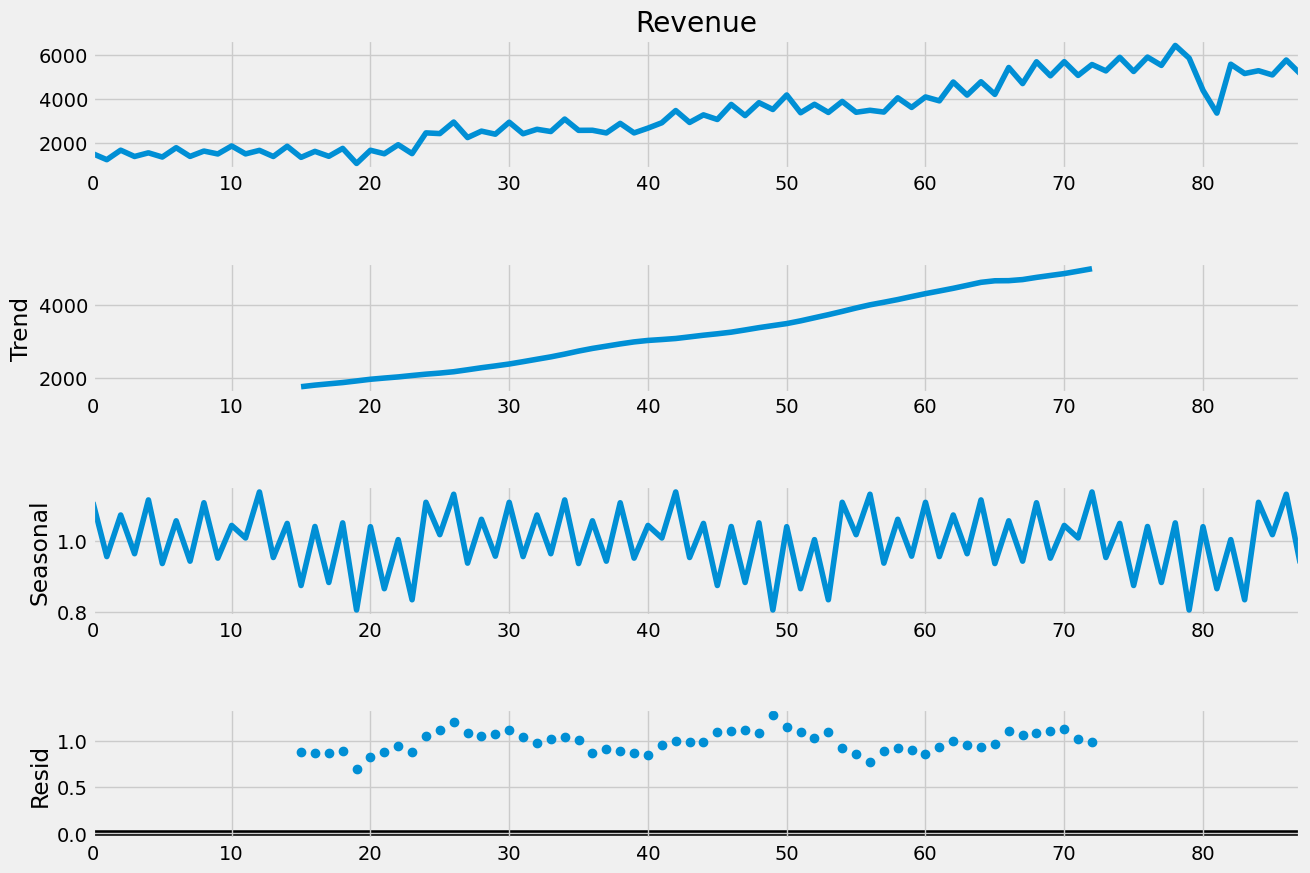

In [23]:
result = seasonal_decompose(data["Revenue"],
                            model='multiplicative',
                            period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

## Seasonal ARIMA (SARIMA) model

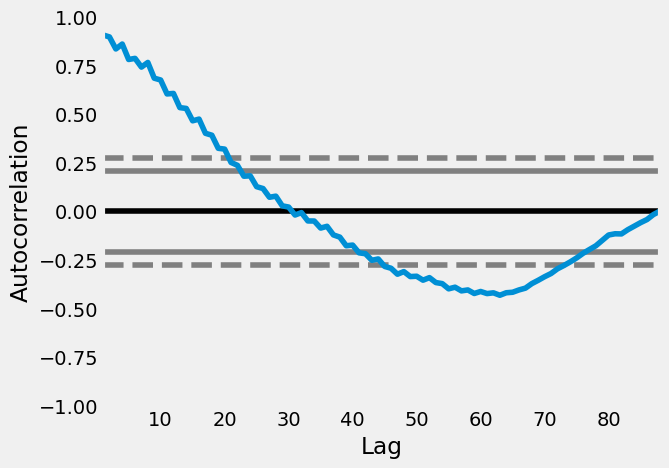

In [24]:
pd.plotting.autocorrelation_plot(data["Revenue"])
plt.show()

/Users/ramyelhadad/miniforge3/envs/finance/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



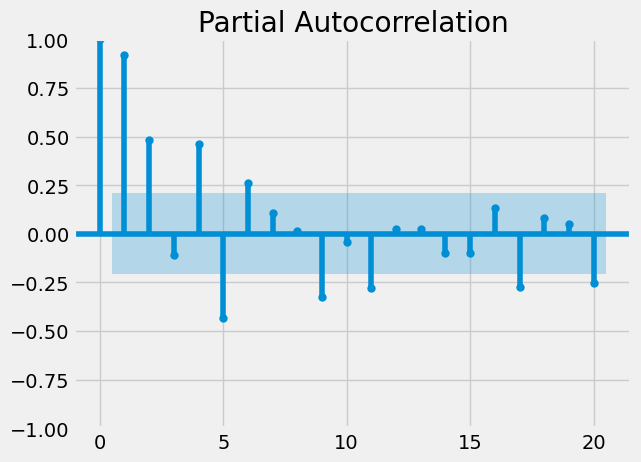

In [25]:
plot_pacf(data["Revenue"], lags = 20)
plt.show()

### Training

In [26]:
d = 1
p = 5
q = 2

model=sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33485D+00    |proj g|=  1.93340D-01


 This problem is unconstrained.



At iterate    5    f=  6.25430D+00    |proj g|=  3.91119D-03

At iterate   10    f=  6.25345D+00    |proj g|=  6.93401D-03

At iterate   15    f=  6.25320D+00    |proj g|=  8.46355D-04

At iterate   20    f=  6.25286D+00    |proj g|=  5.54397D-03

At iterate   25    f=  6.25065D+00    |proj g|=  2.50251D-02

At iterate   30    f=  6.24288D+00    |proj g|=  2.52388D-02

At iterate   35    f=  6.23758D+00    |proj g|=  1.24228D-02

At iterate   40    f=  6.23441D+00    |proj g|=  1.43571D-02

At iterate   45    f=  6.23342D+00    |proj g|=  5.02419D-03


/Users/ramyelhadad/miniforge3/envs/finance/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  6.23319D+00    |proj g|=  1.79956D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     56      1     0     0   1.800D-03   6.233D+00
  F =   6.2331861913190201     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Sun, 08 Jan 2023   AIC                           1127.0

### Predicting

In [27]:
predictions = model.predict(len(data), len(data)+7)
print(predictions)

88    6078.700178
89    5186.276035
90    6293.170934
91    5751.812506
92    5911.920248
93    5499.856576
94    6389.570258
95    5728.778850
Name: predicted_mean, dtype: float64


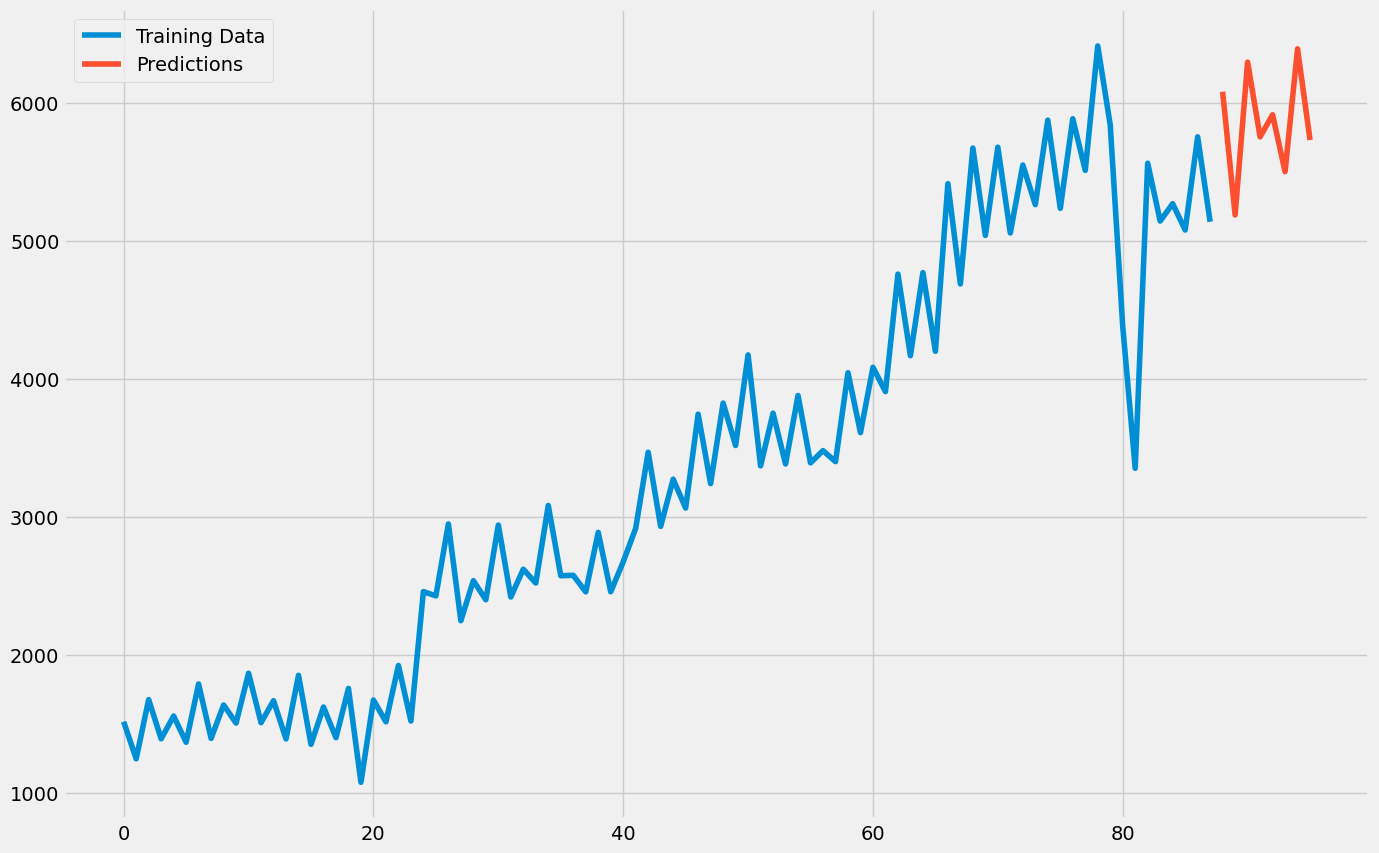

In [28]:
data["Revenue"].plot(legend=True,
                     label="Training Data",
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")
plt.show()